In [551]:
import networkx as nx
import numpy as np
import math

In [552]:
G = nx.read_edgelist("IC.csv") #Read edgelist of IC network

In [553]:
G.is_directed() #Check if graph is directed or not

False

Real Graph


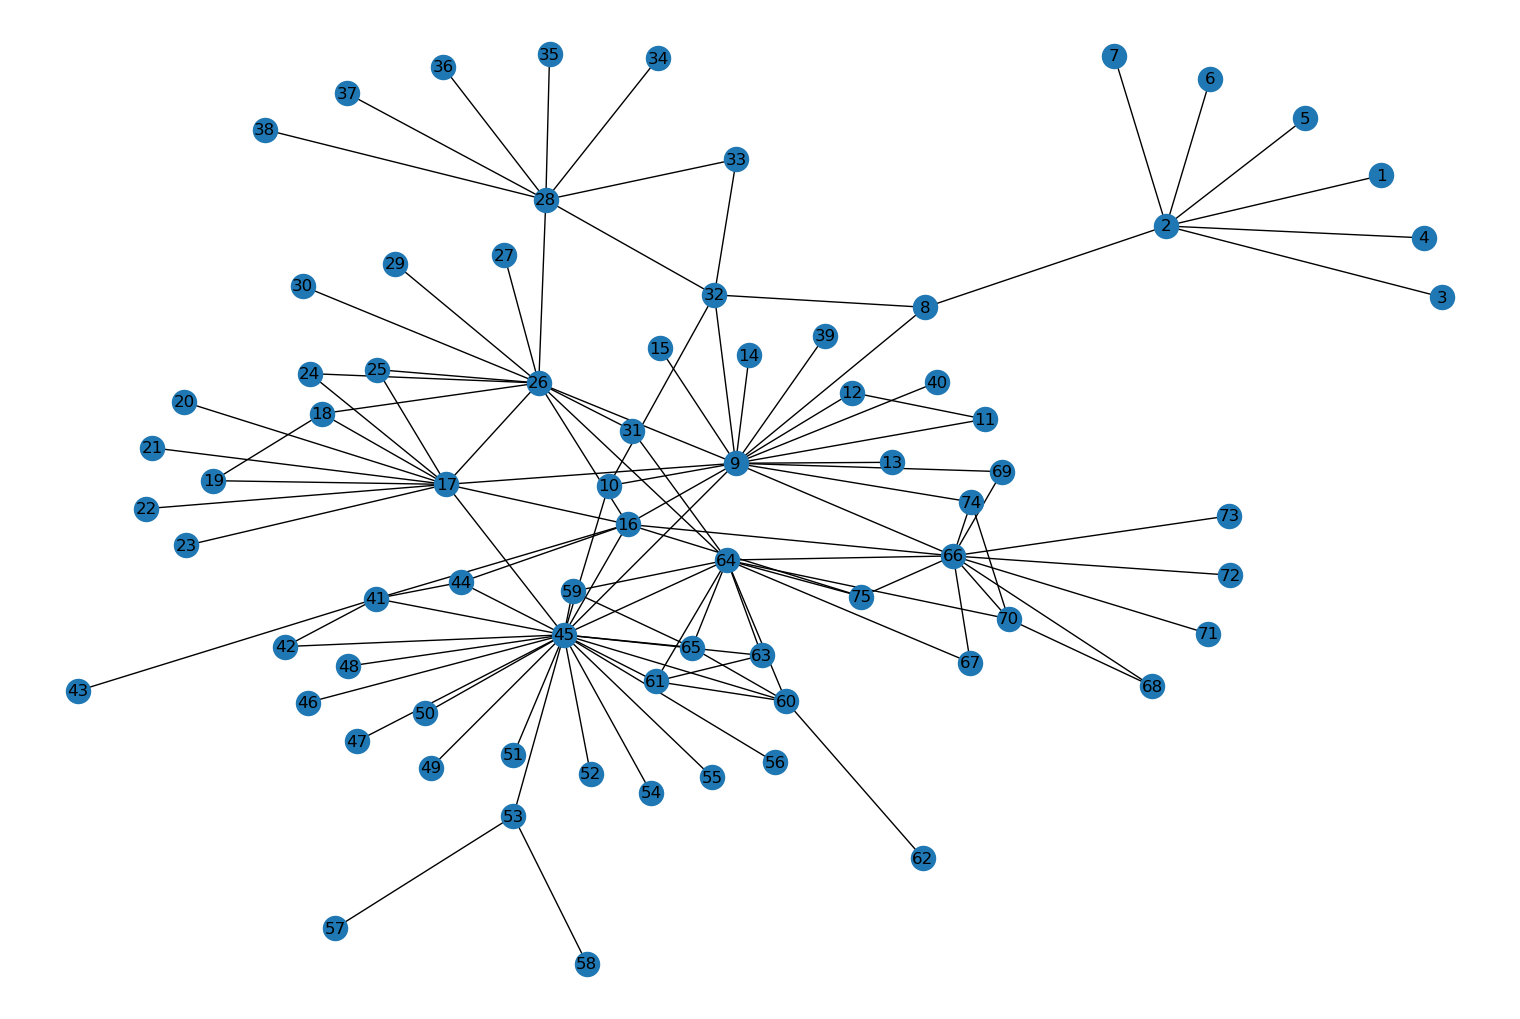

In [554]:
#Plot IC graph using draw function
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels = True)
print('Real Graph')

In [555]:
n = 75 #Number of nodes
m = 114 #Number of edges
p = (m*2)/(n*(n-1)) 
ER = nx.erdos_renyi_graph(n, p) #generate erdos graph

In [556]:
#Generate erdos graph that is connected and has 114 edges 
while(not(nx.is_connected(ER) and len(ER.edges()) == 114)):
    ER = nx.erdos_renyi_graph(n, p)

In [557]:
#check number of edges
len(ER.edges())

114

In [558]:
#Check if random graph is connected or not
nx.is_connected(ER)

True

ER Random Graph


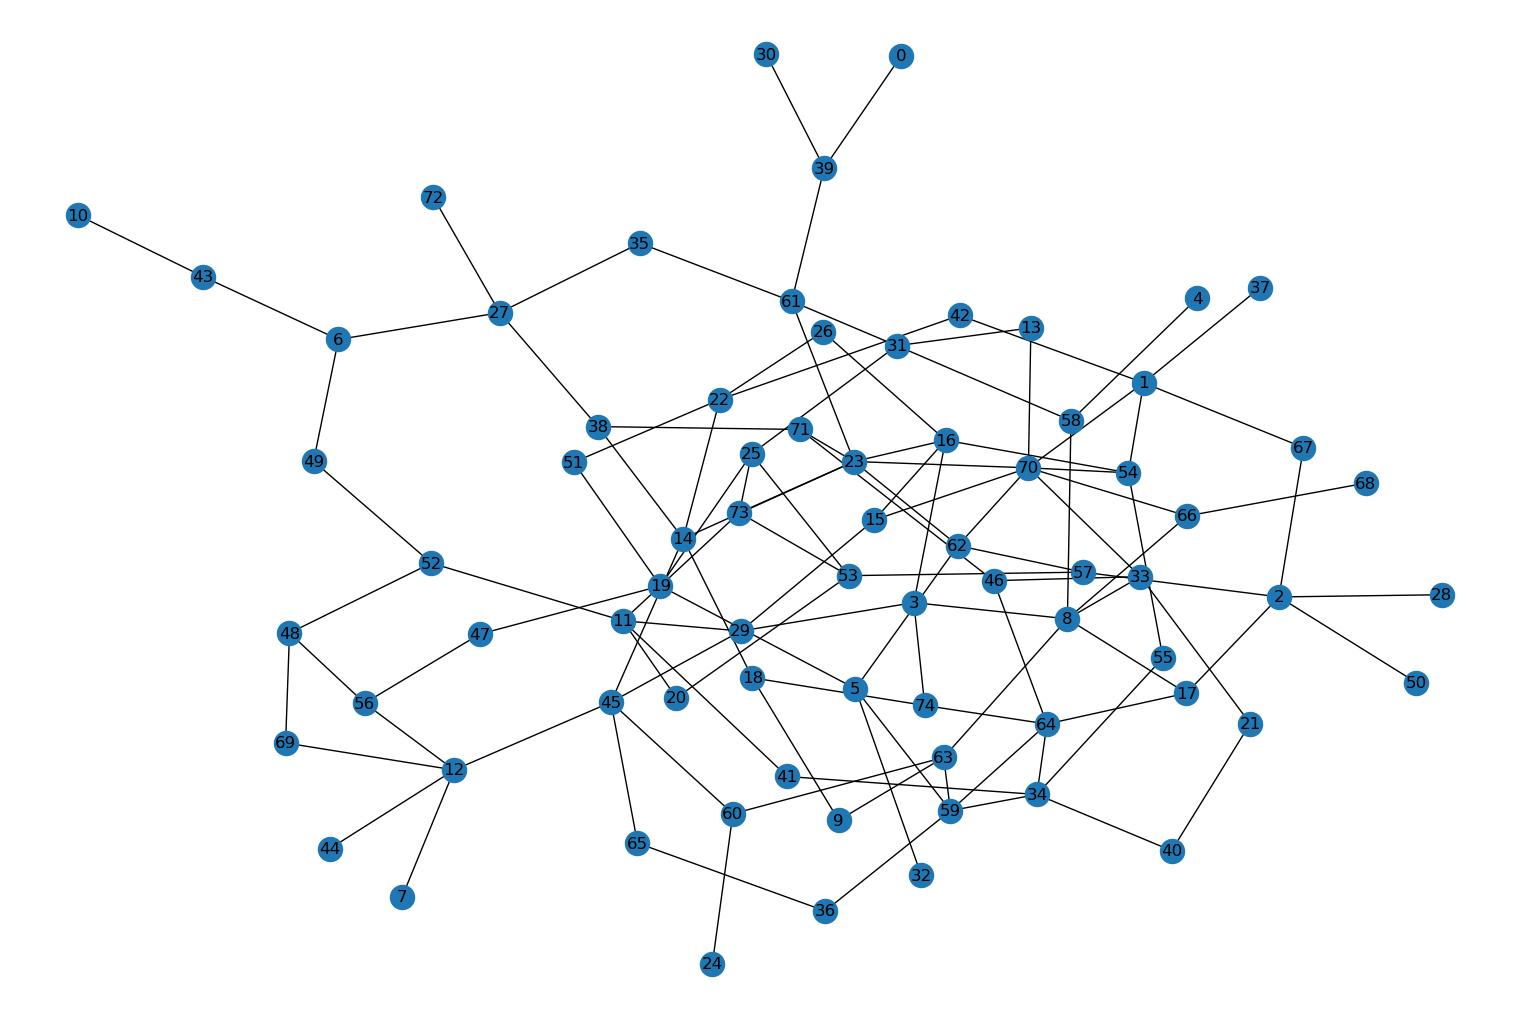

In [559]:
#Plot Random graph using draw function
pos = nx.kamada_kawai_layout(ER)
nx.draw(ER, pos=pos, with_labels = True)
print('ER Random Graph')

In [560]:
#Create edgelist of ER
nx.write_edgelist(ER, "ER.csv")

In [561]:
#define degree distribution function that return range of degrees and the probablity of each
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    
    return kvalues,Pk

In [562]:
#define entropy function
def entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [563]:
degree_distribution(G)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 array([0.        , 0.53333333, 0.14666667, 0.12      , 0.04      ,
        0.04      , 0.        , 0.01333333, 0.02666667, 0.        ,
        0.        , 0.        , 0.05333333, 0.        , 0.        ,
        0.        , 0.        , 0.01333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01333333]))

# Calculate Measures of Each Graph

In [564]:
from statistics import mean,stdev

print('Diameter of Real Graph:', nx.diameter(G))
print('Diameter of Random Graph:', nx.diameter(ER))
print('Radius of Real Graph:', nx.radius(G))
print('Radius of Random Graph:', nx.radius(ER))



#calculate the number of whole triples of Real Graph
a = 0
for i in range(len(G.nodes())):
    for j in range(len(G.nodes())):
        for k in range(len(G.nodes())):
            if i != j and i != k and j != k:
                H = G.subgraph([str(i+1),str(j+1),str(k+1)])
                if nx.is_connected(H):
                    a +=1
#calculate the number of whole triangles of Real Graph
G_triangles = sum(nx.triangles(G).values())/3


#calculate the number of whole triples of Random Graph
b = 0
for i in range(len(ER.nodes())):
    for j in range(len(ER.nodes())):
        for k in range(len(ER.nodes())):
            if i != j and i != k and j != k:
                H = ER.subgraph([i,j,k])
                if nx.is_connected(H):
                    b +=1

#calculate the number of whole triangles of Random Graph
ER_triangles = sum(nx.triangles(ER).values())/3



                    
print('Global Clustering Coefficient of Real Graph:', (3*G_triangles)/(a/6))
print('Global Clustering Coefficient of Random Graph:', (3*ER_triangles)/(b/6))

#create a list of length of shortest path between each pair of nodes in Real Graph
p = nx.shortest_path(G)
ShortestPath = []
for i in range(len(G.nodes())):
    for j in range(len(G.nodes())):
        if i != j:
            ShortestPath.append(len(p[str(i+1)][str(j+1)])-1)
        
        
print('Mean of Shortest Path of Real Graph:',mean(ShortestPath)) 
print('Standard Deviation of Shortest Path of Real Graph:',stdev(ShortestPath))

#create a list of length of shortest path between each pair of nodes in Random Graph
p = nx.shortest_path(ER)
ShortestPath = []
for i in range(len(ER.nodes())):
    for j in range(len(ER.nodes())):
        if i != j:
            ShortestPath.append(len(p[i][j])-1)

print('Mean of Shortest Path of Random Graph:',mean(ShortestPath)) 
print('Standard Deviation of Shortest Path of Random Graph:',stdev(ShortestPath))

print('Mean of Eccentricity of Real Graph:',mean(nx.eccentricity(G).values())) 
print('Standard Deviation of Eccentricity of Real Graph:',stdev(nx.eccentricity(G).values()))

print('Mean of Eccentricity of Random Graph:',mean(nx.eccentricity(ER).values())) 
print('Standard Deviation of Eccentricity of Random Graph:',stdev(nx.eccentricity(ER).values()))

print('Mean of Degree of Real Graph:',mean(dict(G.degree).values())) 
print('Standard Deviation of Degree of Real Graph:',stdev(dict(G.degree).values()))

print('Mean of Degree of Random Graph:',mean(dict(ER.degree).values())) 
print('Standard Deviation of Degree of Random Graph:',stdev(dict(ER.degree).values()))

print('Mean of Closeness of Real Graph:',mean(nx.closeness_centrality(G).values())) 
print('Standard Deviation of Closeness of Real Graph:',stdev(nx.closeness_centrality(G).values()))

print('Mean of Closeness of Random Graph:',mean(nx.closeness_centrality(ER).values())) 
print('Standard Deviation of Closeness of Random Graph:',stdev(nx.closeness_centrality(ER).values()))

print('Mean of Betweenness of Real Graph:',mean(nx.betweenness_centrality(G).values())) 
print('Standard Deviation of Betweenness of Real Graph:',stdev(nx.betweenness_centrality(G).values()))

print('Mean of Betweenness of Random Graph:',mean(nx.betweenness_centrality(ER).values())) 
print('Standard Deviation of Betweenness of Random Graph:',stdev(nx.betweenness_centrality(ER).values()))

print('Mean of Eigenvector of Real Graph:',mean(nx.eigenvector_centrality(G).values())) 
print('Standard Deviation of Eigenvector of Real Graph:',stdev(nx.eigenvector_centrality(G).values()))

print('Mean of Eigenvector of Random Graph:',mean(nx.eigenvector_centrality(ER).values())) 
print('Standard Deviation of Eigenvector of Random Graph:',stdev(nx.eigenvector_centrality(ER).values()))

print('Mean of Pagerank of Real Graph:',mean(nx.pagerank(G).values())) 
print('Standard Deviation of Pagerank of Real Graph:',stdev(nx.pagerank(G).values()))

print('Mean of Pagerank of Random Graph:',mean(nx.pagerank(ER).values())) 
print('Standard Deviation of Pagerank of Random Graph:',stdev(nx.pagerank(ER).values()))

print('Entropy of Degree Distribution of Real Graph:',entropy(G)) 

print('Entropy of Degree Distribution of Random Graph:',entropy(ER)) 


Diameter of Real Graph: 6
Diameter of Random Graph: 10
Radius of Real Graph: 3
Radius of Random Graph: 5
Global Clustering Coefficient of Real Graph: 0.17576564580559254
Global Clustering Coefficient of Random Graph: 0.038461538461538464
Mean of Shortest Path of Real Graph: 3.19963963963964
Standard Deviation of Shortest Path of Real Graph: 1.1046192497964875
Mean of Shortest Path of Random Graph: 4.075315315315315
Standard Deviation of Shortest Path of Random Graph: 1.5196507147577087
Mean of Eccentricity of Real Graph: 4.946666666666666
Standard Deviation of Eccentricity of Real Graph: 0.695416137002589
Mean of Eccentricity of Random Graph: 7.266666666666667
Standard Deviation of Eccentricity of Random Graph: 1.1429375776070652
Mean of Degree of Real Graph: 3.04
Standard Deviation of Degree of Real Graph: 4.0484898752831615
Mean of Degree of Random Graph: 3.04
Standard Deviation of Degree of Random Graph: 1.5372843729262466
Mean of Closeness of Real Graph: 0.3227135255474383
Standard

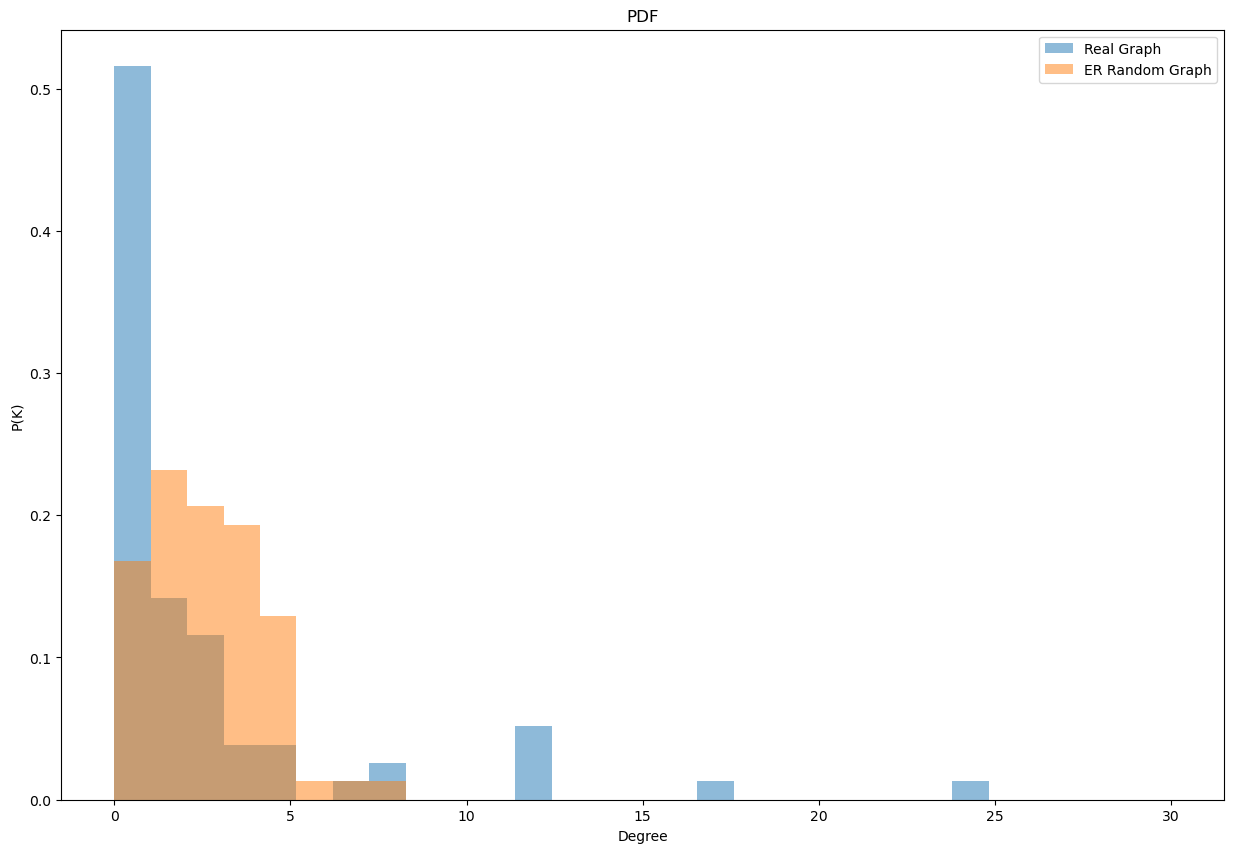

In [565]:
#Plot PDF Histogram Chart 
from matplotlib import pyplot


x = dict(G.degree).values()
y = dict(ER.degree).values()

bins = np.linspace(0, 30, 30)

pyplot.hist(x, bins, alpha= 0.5, label='Real Graph',density = True)
pyplot.hist(y, bins, alpha= 0.5, label='ER Random Graph',density = True)
pyplot.xlabel('Degree')
pyplot.ylabel('P(K)')
pyplot.title('PDF')
pyplot.legend(loc='upper right')
pyplot.show()

Ego Network of Real Graph
Hub: 45


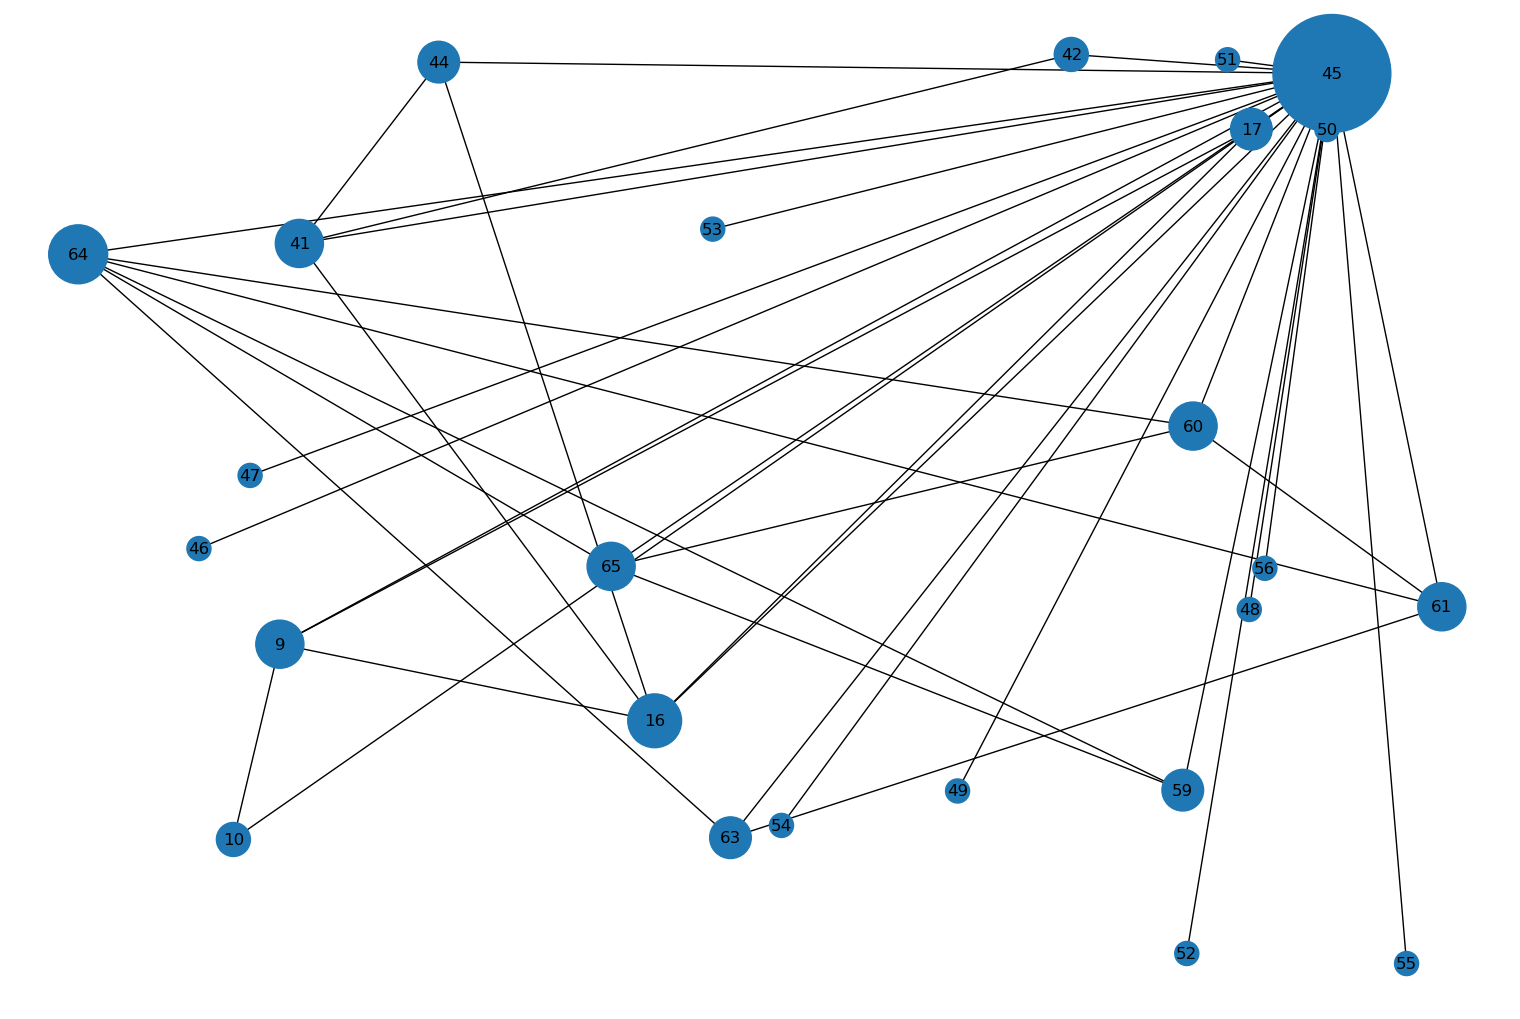

In [566]:
#find the hub node
index = [
    index for index in range(len(G.nodes()))
    
    if list(dict(G.degree).values())[index] == max(list(dict(G.degree).values()))
]

hub = str(index[0]+1)

#generate ego network based on hub node
ego = nx.ego_graph(G, hub)
d = dict(ego.degree)
pos = nx.random_layout(ego)
nx.draw(ego, pos=pos, with_labels = True, node_size = [v * 300 for v in d.values()])
print('Ego Network of Real Graph')
print('Hub:',index[0]+1)

Ego Network of Random Graph
Hub: 70


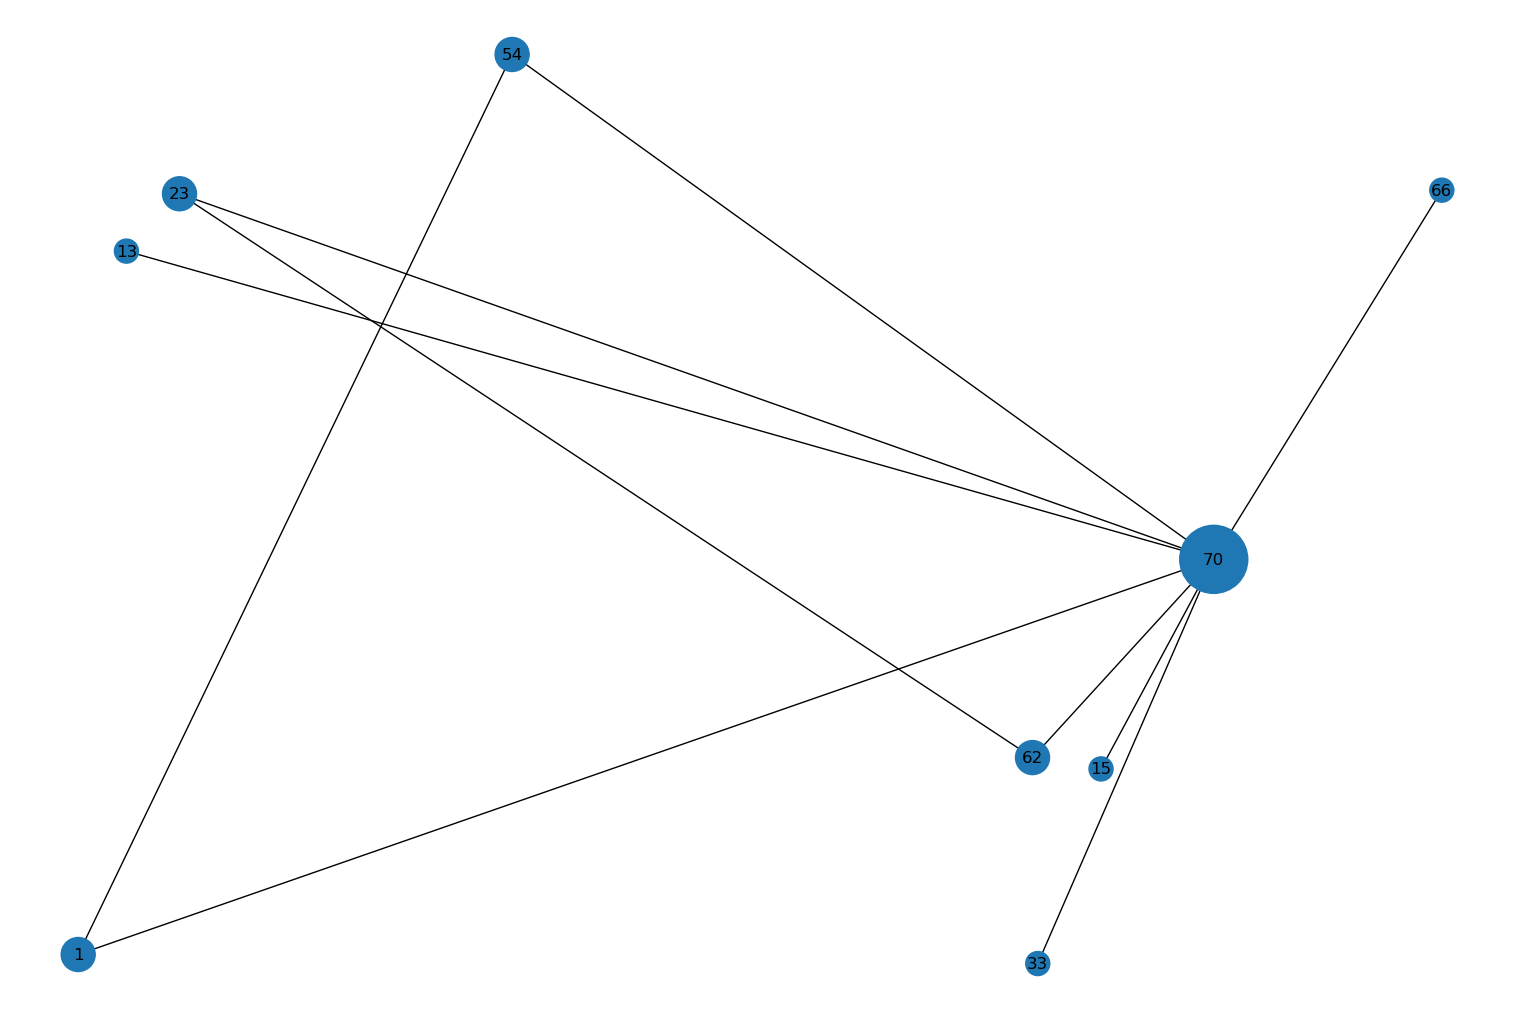

In [567]:
#find the hub node
index = [
    index for index in range(len(ER.nodes()))
    
    if list(dict(ER.degree).values())[index] == max(list(dict(ER.degree).values()))
]
hub = index[0]

#generate ego network based on hub node
ego = nx.ego_graph(ER, hub)
d = dict(ego.degree)
pos = nx.random_layout(ego)
nx.draw(ego, pos=pos, with_labels = True,node_size = [v * 300 for v in d.values()])
print('Ego Network of Random Graph')
print('Hub:',index[0])

In [585]:
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [569]:
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
# Count the communities
print(f"The Real Graph has {len(communities)} communities.")

The Real Graph has 8 communities.


In [570]:
#Add community to node attributes
def set_node_community(G, communities):
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

#Find internal edges and add their community to their attributes            
def set_edge_community(G):
    #Find internal edges and add their community to their attributes
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
#Assign a color to a vertex   
def get_color(i, r_off=1, g_off=1, b_off=1):
    #Assign a color to a vertex
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [571]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

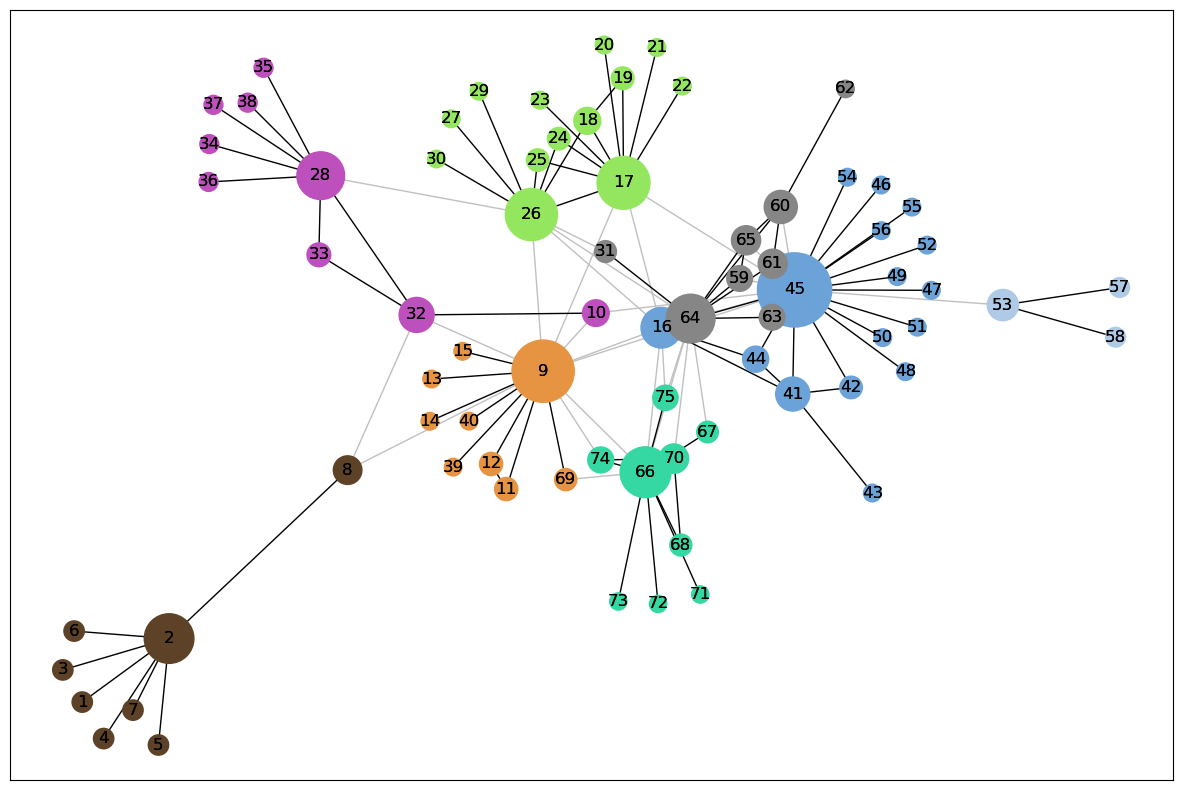

In [582]:
pos = nx.spring_layout(G)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges

d = nx.pagerank(G)
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
    node_size = [v * 30000 for v in d.values()])